# Importación de los datos
---

In [2]:
import pandas as pd
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
training_labels= pd.read_csv('training_labels.csv')

training.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

# Preprocesado

Compruebo si todos los ids del conjunto de datos de datos del training y training labels tienen los mismos, todos coinciden. 

In [3]:
print(training['id'].isin(training_labels['id']).value_counts())

True    59400
Name: id, dtype: int64


Junto el conjunto de datos del training con sus correspondientes etiquetas

In [4]:
train = pd.merge(training, training_labels, on = "id", how = "left")

Compruebo si se ha añadido la columna de la etiqueta

In [5]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Compruebo si los ids son únicos para convertirlos en índice

In [6]:
train.shape[0]

59400

In [7]:
len(train['id'].unique())

59400

Como cada id es único, convierto la columna en índice y compruebo si se ha realizado correctamente

In [8]:
train.set_index('id', inplace=True)
train.head()

amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   
67743         0.0    2013-01-28        Unicef         263        UNICEF   
19728         0.0    2011-07-13   Action In A           0       Artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   

                         basin  ... water_quality quality_group      quantity  \
id                              ...                                             
69572               Lake Nyasa  ...          soft          good        enough   
8776             Lake Victoria  ...          soft          good  insufficient   
34310                  Pangani  ...          soft          good        enough   
67743  Ruvuma / Southern Coast  ...          soft          good           dry   
19728            Lake Victoria  ...          soft          good      seasonal   

       quantity_group                source           source_type  \
id                                                                  
69572          enough                spring                spring   
8776     insufficient  rainwater harvesting  rainwater harvesting   
34310          enough                   dam                   dam   
67743             dry           machine dbh              borehole   
19728        seasonal  rainwater harvesting  rainwater harvesting   

       source_class              waterpoint_type waterpoint_type_group  \
id                                                                       
69572   groundwater           communal standpipe    communal standpipe   
8776        surface           communal standpipe    communal standpipe   
34310       surface  communal standpipe multiple    communal standpipe   
67743   groundwater  communal standpipe multiple    communal standpipe   
19728       surface           communal standpipe    communal standpipe   

         status_group  
id                     
69572      functional  
8776       functional  
34310      functional  
67743  non functional  
19728      functional  

[5 rows x 40 columns]

Convierto los datos de las columnas de tipo objeto en minúsculas

In [9]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].fillna('nan')
        train[column] = train[column].apply(lambda x: x.lower() if type(x) == str else x)
train.head()

amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         roman        1390         roman   
8776          0.0    2013-03-06       grumeti        1399       grumeti   
34310        25.0    2013-02-25  lottery club         686  world vision   
67743         0.0    2013-01-28        unicef         263        unicef   
19728         0.0    2011-07-13   action in a           0       artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              zahanati            0   
34310  37.460664  -3.821329           kwa mahundi            0   
67743  38.486161 -11.155298  zahanati ya nanyumbu            0   
19728  31.130847  -1.825359               shuleni            0   

                         basin  ... water_quality quality_group      quantity  \
id                              ...                                             
69572               lake nyasa  ...          soft          good        enough   
8776             lake victoria  ...          soft          good  insufficient   
34310                  pangani  ...          soft          good        enough   
67743  ruvuma / southern coast  ...          soft          good           dry   
19728            lake victoria  ...          soft          good      seasonal   

       quantity_group                source           source_type  \
id                                                                  
69572          enough                spring                spring   
8776     insufficient  rainwater harvesting  rainwater harvesting   
34310          enough                   dam                   dam   
67743             dry           machine dbh              borehole   
19728        seasonal  rainwater harvesting  rainwater harvesting   

       source_class              waterpoint_type waterpoint_type_group  \
id                                                                       
69572   groundwater           communal standpipe    communal standpipe   
8776        surface           communal standpipe    communal standpipe   
34310       surface  communal standpipe multiple    communal standpipe   
67743   groundwater  communal standpipe multiple    communal standpipe   
19728       surface           communal standpipe    communal standpipe   

         status_group  
id                     
69572      functional  
8776       functional  
34310      functional  
67743  non functional  
19728      functional  

[5 rows x 40 columns]

In [10]:
porcentaje_nulos = train.isnull().sum() / len(train)
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
print(porcentaje_nulos)

Series([], dtype: float64)


In [11]:
import numpy as np
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].replace('nan', np.nan)

In [12]:
porcentaje_nulos = train.isnull().sum() / len(train)
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
print(porcentaje_nulos)

funder               0.061195
installer            0.061532
subvillage           0.006246
public_meeting       0.056128
scheme_management    0.065269
scheme_name          0.474175
permit               0.051448
dtype: float64


# Variable objetivo

Convierto la variable 'status_group' en numérica

In [13]:
train['status_group'].replace(('non functional', 'functional', 'functional needs repair'),
                      (0,1,2),inplace=True)

In [14]:
train['status_group'].value_counts(normalize= True)

1    0.543081
0    0.384242
2    0.072677
Name: status_group, dtype: float64

Hay desbalanceo de los datos, sólo hay un 7% que necesitan reparación

# Reporte descriptivo

In [15]:
train.head(10)

amount_tsh date_recorded               funder  gps_height  \
id                                                                 
69572      6000.0    2011-03-14                roman        1390   
8776          0.0    2013-03-06              grumeti        1399   
34310        25.0    2013-02-25         lottery club         686   
67743         0.0    2013-01-28               unicef         263   
19728         0.0    2011-07-13          action in a           0   
9944         20.0    2011-03-13  mkinga distric coun           0   
19816         0.0    2012-10-01                 dwsp           0   
54551         0.0    2012-10-09                rwssp           0   
53934         0.0    2012-11-03             wateraid           0   
46144         0.0    2011-08-03          isingiro ho           0   

          installer  longitude   latitude              wpt_name  num_private  \
id                                                                             
69572         roman  34.938093  -9.856322                  none            0   
8776        grumeti  34.698766  -2.147466              zahanati            0   
34310  world vision  37.460664  -3.821329           kwa mahundi            0   
67743        unicef  38.486161 -11.155298  zahanati ya nanyumbu            0   
19728       artisan  31.130847  -1.825359               shuleni            0   
9944            dwe  39.172796  -4.765587                tajiri            0   
19816          dwsp  33.362410  -3.766365            kwa ngomho            0   
54551           dwe  32.620617  -4.226198          tushirikiane            0   
53934     water aid  32.711100  -5.146712     kwa ramadhan musa            0   
46144       artisan  30.626991  -1.257051               kwapeto            0   

                         basin  ... water_quality quality_group      quantity  \
id                              ...                                             
69572               lake nyasa  ...          soft          good        enough   
8776             lake victoria  ...          soft          good  insufficient   
34310                  pangani  ...          soft          good        enough   
67743  ruvuma / southern coast  ...          soft          good           dry   
19728            lake victoria  ...          soft          good      seasonal   
9944                   pangani  ...         salty         salty        enough   
19816                 internal  ...          soft          good        enough   
54551          lake tanganyika  ...         milky         milky        enough   
53934          lake tanganyika  ...         salty         salty      seasonal   
46144            lake victoria  ...          soft          good        enough   

       quantity_group                source           source_type  \
id                                                                  
69572          enough                spring                spring   
8776     insufficient  rainwater harvesting  rainwater harvesting   
34310          enough                   dam                   dam   
67743             dry           machine dbh              borehole   
19728        seasonal  rainwater harvesting  rainwater harvesting   
9944           enough                 other                 other   
19816          enough           machine dbh              borehole   
54551          enough          shallow well          shallow well   
53934        seasonal           machine dbh              borehole   
46144          enough          shallow well          shallow well   

       source_class              waterpoint_type waterpoint_type_group  \
id                                                                       
69572   groundwater           communal standpipe    communal standpipe   
8776        surface           communal standpipe    communal standpipe   
34310       surface  communal standpipe multiple    communal standpipe   
67743   groundwater  communal standpipe multiple    commu

In [16]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missings

Voy a actuar por dos vías, filas y columnas para contar el % de perdidos en cada registro y en cada variable. Con esta información tomaré decisiones sobre gestión.

In [17]:
porcentaje_nulos = train.isnull().sum() / len(train)
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
print(porcentaje_nulos)

funder               0.061195
installer            0.061532
subvillage           0.006246
public_meeting       0.056128
scheme_management    0.065269
scheme_name          0.474175
permit               0.051448
dtype: float64


In [18]:
#Proporción de missings por observación (como una nueva columna del dataset)
train['prop_missings'] = train.apply(lambda x: x.isna().sum()/x.count()*100,axis=1)

# valoro la distribución
train['prop_missings'].describe()

count    59400.000000
mean         2.037200
std          2.492548
min          0.000000
25%          0.000000
50%          2.564103
75%          2.564103
max         17.647059
Name: prop_missings, dtype: float64

Voy a ordenar el dataset por la nueva variable creada para ver el aspecto.

In [19]:
train.sort_values(by='prop_missings', ascending=False).head()

amount_tsh date_recorded funder  gps_height installer  longitude  \
id                                                                        
65087         0.0    2013-03-19    NaN        1143       NaN  36.320944   
6450          0.0    2013-10-03    NaN        1303       NaN  36.900911   
19795         0.0    2013-03-14    NaN        1287       NaN  36.760284   
71282         0.0    2013-03-19    NaN        1289       NaN  36.189340   
66687         0.0    2013-10-03    NaN        1304       NaN  36.900464   

       latitude            wpt_name  num_private     basin  ... quality_group  \
id                                                          ...                 
65087 -2.823900            madukani            7  internal  ...       unknown   
6450  -3.111477  pentecoste swidish            0  internal  ...       unknown   
19795 -3.388704              erasto            0   pangani  ...       unknown   
71282 -3.422393         mongoriondo            0  internal  ...       unknown   
66687 -3.112022    zahanati ngabobo            0  internal  ...       unknown   

      quantity  quantity_group   source source_type source_class  \
id                                                                 
65087  unknown         unknown  unknown       other      unknown   
6450   unknown         unknown   spring      spring  groundwater   
19795  unknown         unknown  unknown       other      unknown   
71282  unknown         unknown  unknown       other      unknown   
66687  unknown         unknown   spring      spring  groundwater   

          waterpoint_type waterpoint_type_group status_group prop_missings  
id                                                                          
65087           hand pump             hand pump            1     17.647059  
6450   communal standpipe    communal standpipe            1     17.647059  
19795  communal standpipe    communal standpipe            1     17.647059  
71282  communal standpipe    communal standpipe            1     17.647059  
66687  communal standpipe    communal standpipe            1     17.647059  

[5 rows x 41 columns]

Veo que los missings se deben a algunas variables y no hay observaciones mal documentados.

Elimino la variable scheme_name por tener demasiados missings

In [20]:
train = train.drop(['scheme_name'], axis=1)
train.shape[1]

40

Elimino la variable subvillage, longitud, latitud porque ya hay otras variables que me hablan sobre la localización geográfica

In [21]:
train = train.drop(['subvillage'], axis=1)
train.shape[1]

39

In [22]:
train = train.drop(['longitude'], axis=1)
train.shape[1]

38

In [23]:
train = train.drop(['latitude'], axis=1)
train.shape[1]

37

# Variables con información duplicada

#### payment y payment_type

In [24]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [25]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [26]:
train.shape[1]

37

In [27]:
train = train.drop(['payment_type'], axis=1)
train.shape[1]

36

#### quantity y quantity_group

In [28]:
train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [29]:
train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [30]:
train = train.drop(['quantity_group'], axis=1)
train.shape[1]

35

#### quality_group y water_quality

In [31]:
train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [32]:
train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [33]:
train = train.drop(['water_quality'], axis=1)
train.shape[1]

34

#### source, source_type y source_class

In [34]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [35]:
train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [36]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [37]:
train = train.drop(['source'], axis=1)
train.shape[1]

33

In [38]:
train = train.drop(['source_type'], axis=1)
train.shape[1]

32

#### waterpoint_type y waterpoint_type_group

In [39]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [40]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [41]:
train = train.drop(['waterpoint_type'], axis=1)
train.shape[1]

31

#### management y management_group

In [42]:
train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [43]:
train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [44]:
train = train.drop(['management'], axis=1)
train.shape[1]

30

#### extraction_type, extraction_type_class y extraction_type_group

In [45]:
train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [46]:
train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [47]:
train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [48]:
train = train.drop(['extraction_type', 'extraction_type_group'], axis=1)
train.shape[1]

28

# Variable constante

In [49]:
train['recorded_by'].nunique()

1

In [50]:
train = train.drop(['recorded_by'], axis= 1)
train.shape[1]

27

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   wpt_name               59400 non-null  object 
 6   num_private            59400 non-null  int64  
 7   basin                  59400 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  ward                   59400 non-null  object 
 13  population             59400 non-null  int64  
 14  public_meeting         56066 non-null  object 
 15

# Variable objetivo

Separo la variable objetivo del dataframe

In [52]:
varObjetivo = pd.DataFrame(train['status_group'])
train = train.drop(['status_group'], axis=1)

# Variables con muchos datos 0

amount_tsh has 41639 (70.1%) zeros


gps_height has 20438 (34.4%) zero


longitude has 1812 (3.1%) zeros


num_private has 58643 (98.7%) zeros


population has 21381 (36.0%) zeros


construction_year has 20709 (34.9%) zeros

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
variables_0 = ['amount_tsh', 'gps_height', 'num_private', 'population', 'construction_year']
contador = 0

for i in variables_0:
    axs[contador // 3][contador % 3].hist(train[i].dropna())
    axs[contador // 3][contador % 3].set_title(i)
    contador += 1

plt.show()

C:\Users\Kim\AppData\Local\Temp\ipykernel_13848\3304762423.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Elimino amount_tsh y num_private porque más del 70% son 0

In [54]:
train = train.drop(['amount_tsh', 'num_private'], axis=1)
train.shape[1]

24

Las variables 'population', 'gps_height' y 'longitude' puede que tenga sentido que haya tantos valores 0

En cuanto a la variable 'construction_year', voy a pasar esos 0 a nan para ver si ha patrón de missings

In [55]:
train['construction_year_nan'] = train['construction_year']
train['construction_year_nan'] = np.where(train['construction_year_nan'] == 0, 
                                          np.nan, 
                                          train['construction_year_nan'])

In [56]:
print("La columna 'construction_year' tiene {} valores iguales a 0.".format(
    (train['construction_year'] == 0).sum()))
print("La columna 'construction_year_nan' tiene {} valores Nan.".format(
    (train["construction_year_nan"].isna().sum())))

La columna 'construction_year' tiene 20709 valores iguales a 0.
La columna 'construction_year_nan' tiene 20709 valores Nan.


#### ¿Patrón?

<AxesSubplot: >

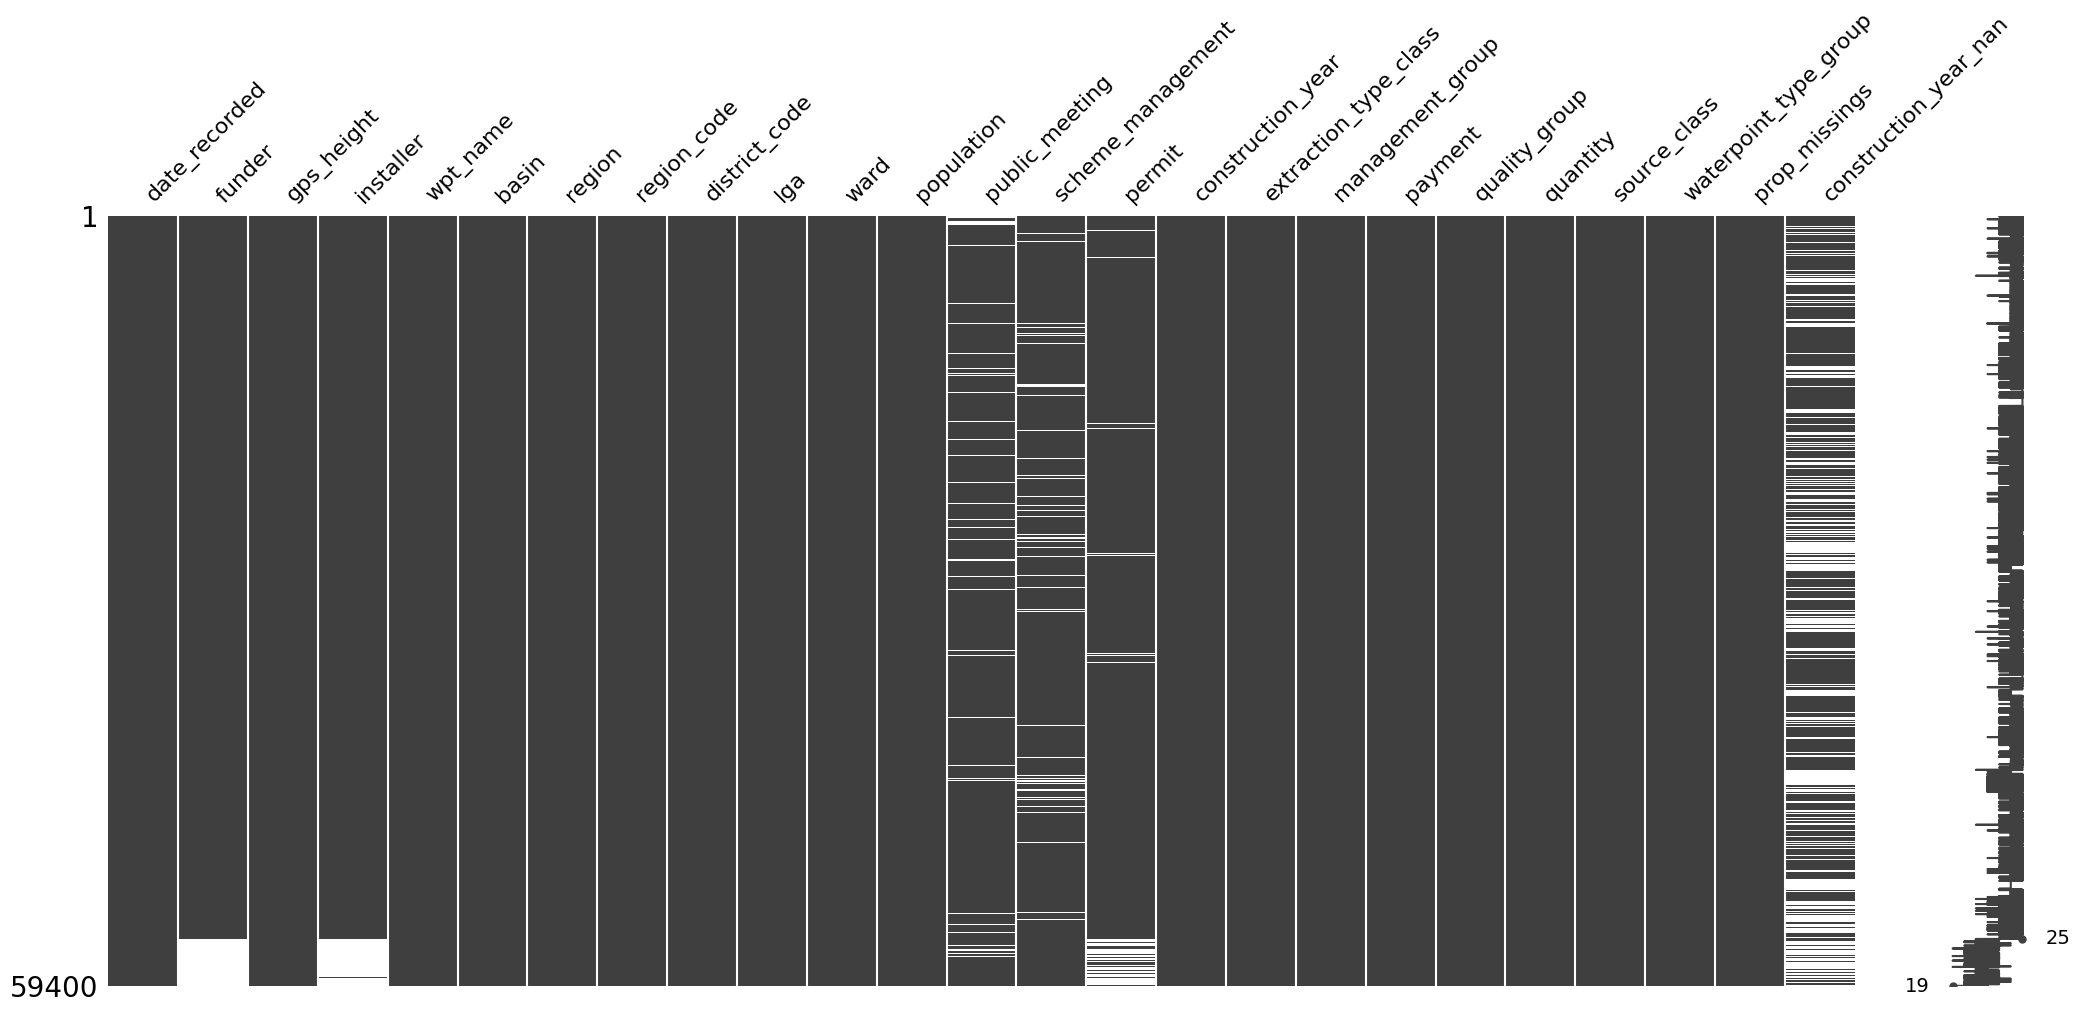

In [57]:
%matplotlib inline
import missingno as msno   
msno.matrix(train.sort_values(by='funder'))

<AxesSubplot: >

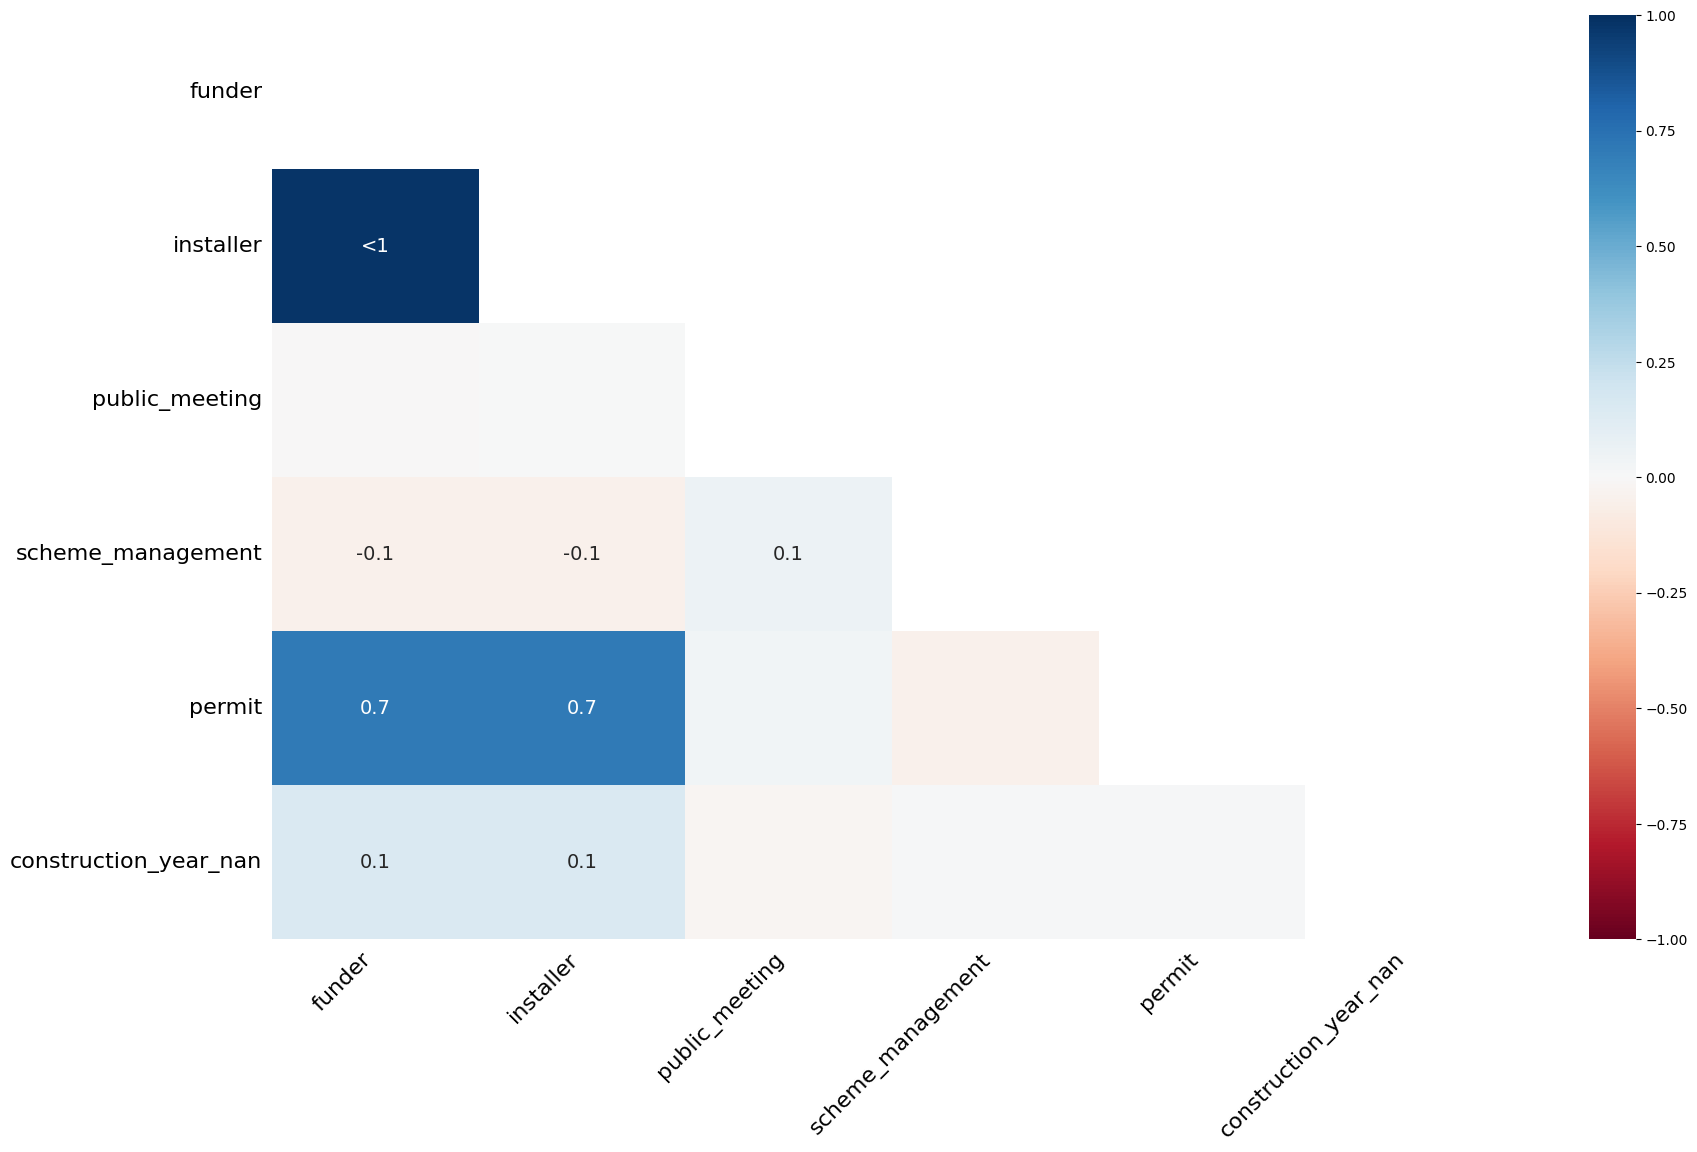

In [58]:
msno.heatmap(train)


Cuando hay missings en funder hay missings en installer, no existe patrón de los valores 0 de construction_year, decido imputar con KNNImputer e IterativeImputer.

#### Imputación - construction_year

In [59]:
from sklearn.impute import KNNImputer
import pandas as pd
imputer = KNNImputer(n_neighbors=3)
train['construction_year_nan_KNNImputer'] = imputer.fit_transform(train[['construction_year_nan']])

In [60]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=5)
train['construction_year_nan_IterativeImputer'] = imputer.fit_transform(train[['construction_year_nan']])


In [61]:
train['construction_year_nan_KNNImputer'] = train['construction_year_nan_KNNImputer'].round().astype(int)
train['construction_year_nan_KNNImputer']

id
69572    1999
8776     2010
34310    2009
67743    1986
19728    1997
         ... 
60739    1999
27263    1996
37057    1997
31282    1997
26348    2002
Name: construction_year_nan_KNNImputer, Length: 59400, dtype: int32

In [62]:
train['construction_year_nan_IterativeImputer'] = train['construction_year_nan_IterativeImputer'].round().astype(int)
train['construction_year_nan_IterativeImputer']

id
69572    1999
8776     2010
34310    2009
67743    1986
19728    1997
         ... 
60739    1999
27263    1996
37057    1997
31282    1997
26348    2002
Name: construction_year_nan_IterativeImputer, Length: 59400, dtype: int32

In [63]:
col1 = train['construction_year_nan_KNNImputer'].copy()
col2 = varObjetivo['status_group'].copy()
df = pd.concat([col1, col2], axis=1)
correlation = df.corr()
print(correlation)


                                  construction_year_nan_KNNImputer  \
construction_year_nan_KNNImputer                          1.000000   
status_group                                              0.167027   

                                  status_group  
construction_year_nan_KNNImputer      0.167027  
status_group                          1.000000  


In [64]:
col1 = train['construction_year_nan_IterativeImputer'].copy()
col2 = varObjetivo['status_group'].copy()
df = pd.concat([col1, col2], axis=1)
correlation = df.corr()
print(correlation)

                                        construction_year_nan_IterativeImputer  \
construction_year_nan_IterativeImputer                                1.000000   
status_group                                                          0.167027   

                                        status_group  
construction_year_nan_IterativeImputer      0.167027  
status_group                                1.000000  


In [65]:
col1 = train['construction_year'].copy()
col2 = varObjetivo['status_group'].copy()
df = pd.concat([col1, col2], axis=1)
correlation = df.corr()
print(correlation)

                   construction_year  status_group
construction_year           1.000000      0.009057
status_group                0.009057      1.000000


Como tienen la misma correlación con la variable objetivo, me quedo con la imputación por KNNImputer

In [66]:
train = train.drop('construction_year_nan_IterativeImputer', axis=1)
train = train.drop('construction_year', axis=1)

In [67]:
train = train.drop('construction_year_nan', axis= 1)

In [68]:
porcentaje_nulos = train.isnull().sum() / len(train)
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
print(porcentaje_nulos)

funder               0.061195
installer            0.061532
public_meeting       0.056128
scheme_management    0.065269
permit               0.051448
dtype: float64


# Transformación variables

Transformo la columna 'date_recorded' a tipo fecha

In [69]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

In [70]:
train.columns

Index(['date_recorded', 'funder', 'gps_height', 'installer', 'wpt_name',
       'basin', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity', 'source_class', 'waterpoint_type_group', 'prop_missings',
       'construction_year_nan_KNNImputer'],
      dtype='object')

#### funder

In [71]:
funder_counts = train['funder'].value_counts()
print(funder_counts)

government of tanzania    9084
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
                          ... 
rarymond ekura               1
justine marwa                1
municipal council            1
afdp                         1
samlo                        1
Name: funder, Length: 1897, dtype: int64


In [72]:
otros_funders = funder_counts[funder_counts < 5].index.tolist()
train.loc[train['funder'].isin(otros_funders), 'funder'] = 'Other'
print(train['funder'].value_counts())

government of tanzania    9084
danida                    3114
hesawa                    2202
Other                     1897
rwssp                     1374
                          ... 
trachoma                     5
tcrs.tlc                     5
caltas                       5
dbspe                        5
mdgwc                        5
Name: funder, Length: 573, dtype: int64


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
le.fit(train['funder'].unique())
le.classes_

array(['0', 'Other', 'a/co germany', 'aar', 'abasia', 'abd',
       'aco/germany', 'acra', 'action aid', 'action contre la faim',
       'adb', 'adf', 'adp', 'adp mombo', 'adra', 'af', 'african',
       'african development bank', 'african development foundation',
       'african muslim agency', 'african relie', 'africare', 'ai', 'aic',
       'aict', 'aimgold', 'amref', 'anglican church', 'angrikana', 'asb',
       'asdp', 'auwasa', 'ba as', 'bahewasa', 'balo', 'bank',
       'baptist church', 'baric', 'belgian government', 'bened',
       'benguka', 'bffs', 'bgm', 'bilila', 'biore', 'br', 'brdp',
       'british colonial government', 'bruder', 'bs', 'bsf',
       'bulyahunlu gold mine', 'cafod', 'caltas', 'caltus', 'camavita',
       'canada', 'care international', 'caritas', 'cbhi', 'cct', 'cdcg',
       'cdtf', 'cefa', 'cefa-njombe', 'ces (gmbh)', 'ces(gmbh)', 'cg',
       'chamavita', 'china government', 'churc', 'church',
       'cipro/care/tcrs', 'cipro/government', 'clause', 'c

In [186]:
funder_column = train['funder'].copy()
funder_column[np.isnan(funder_column)] = 'NaN'
le = LabelEncoder()
funder_encoded = le.fit_transform(funder_column)
funder_encoded[funder_column == 'NaN'] = np.nan
train['funder_encoded'] = funder_encoded

In [187]:
train['funder'].head()

id
69572    411
8776     164
34310    277
67743    522
19728      1
Name: funder, dtype: int32

In [82]:
train['funder_encoded']

KeyError: 'funder_encoded'

In [80]:
train['funder']

id
69572              roman
8776             grumeti
34310       lottery club
67743             unicef
19728              Other
              ...       
60739    germany republi
27263        cefa-njombe
37057                NaN
31282              Other
26348         world bank
Name: funder, Length: 59400, dtype: object

In [79]:
train['funder_KNNImputer'] = imputer.fit_transform(train[['funder']])

ValueError: could not convert string to float: 'roman'

In [ ]:
train['funder_IterativeImputer'] = imputer.fit_transform(train[['funder']])

In [ ]:
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
pd.Series(y_pred)

# Modelo 1

In [ ]:
model1 = RandomForestClassifier()

In [ ]:
train['num_private'].nunique()

In [ ]:
train['population'].value_counts()

In [ ]:
train['extraction_type_class'].value_counts()

In [ ]:
train[train.amount_tsh==0]['amount_tsh'].count()/train.shape[0]

Esta variable tiene un 70% de valores 0, no aporta al modelo

In [ ]:
train['recorded_by'].nunique()

recorded_by tiene un valor constante, no aporta al modelo

In [ ]:
len(train[train['construction_year']==0])/len(train)

Tiene un 34% de 0

In [ ]:
train.construction_year.nunique()

In [ ]:
train = train.drop(['amount_tsh', 'extraction_type', 'extraction_type_class', 'lga', 'latitude', 
                    'longitude', 'management_group', 'num_private', 'payment', 'quantity', 
                    'recorded_by', 'region', 'scheme_name', 'source_class', 'source_type', 'subvillage', 
                    'ward', 'water_quality', 'waterpoint_type', 'wpt_name', 'payment_type',
                   'quantity_group'], axis=1)

In [ ]:
len(train['region'].unique())

In [ ]:
var_categoricas = train.select_dtypes(include = 'object')
numero_categorias = pd.DataFrame({
    "variable": var_categoricas.columns,
    "categorias": [len(var_categoricas[col].unique()) for col in var_categoricas]
})


In [ ]:
numero_categorias.sort_values(by='categorias')

In [ ]:
# -- Variables categoricas
datcat_df = dattrainOr.select_dtypes(include='object')
# Mediante un bucle for recuperamos el numero de categorias de cada variable caracter
numlev_df = pd.DataFrame({
    "vars": datcat_df.columns,
    "levels": [len(datcat_df[col].unique()) for col in datcat_df]
})
# Eliminamos los nombres de fila
numlev_df.index.name = None

# -- Ordenamos de menor a mayor numero de categorias
numlev_df_ordenado = numlev_df.sort_values(by="levels")

color_me = numlev_df_ordenado.index[(numlev_df_ordenado["levels"] < 1000) & (numlev_df_ordenado["levels"] > 1)]
display(numlev_df_ordenado.style
# -- Conservamos variables con categorias > 1 & < 1000
vars_gd = numlev_df.loc[(numlev_df["levels"] < 1000) & (numlev_df["levels"] > 1), "vars"]
datcat_gd = datcat_df[vars_gd]
# -- Variables numericas
datnum_df = dattrainOr.select_dtypes(include='number')
# Unificamos ambos tipos de variables...
datnumcat_df = pd.concat([datnum_df, datcat_gd], axis=1)
# ...Como tambien la variable objetivo
dattrainOrlab = pd.merge(datnumcat_df, dattrainLabOr, on='id', sort=False)

## Coexistencia y patrones de missings
Compruebo si existe algún patrón de aparición de los missings con el paquete **missingno**.

In [ ]:
import missingno as msno
import matplotlib

In [ ]:
%matplotlib inline
msno.matrix(train.sort_values(by='funder'))

In [ ]:
msno.heatmap(train)

Cuando hay missings en funder, hay missings en installer y un 70% también en permit. 

# Eliminar Variables

In [ ]:
train[train.amount_tsh==0]['amount_tsh'].count()

In [ ]:
train = train.drop('scheme_name', axis=1)

# Transformación de las variables

Convierto la variable date_recorded en tipo fecha

In [ ]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

In [ ]:
lista_numericas=['amount_tsh']
lista_categoricas=['job','marital','education','contact','month','poutcome']
categoricas_binarias = ['default','housing','loan','y']

# Balanceo de los datos

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(train['status_group']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train['status_group']==0)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(train['status_group']==2)))

sm = SMOTE(random_state=2,sampling_strategy=0.3)
df_bank_res, y_bank_res = sm.fit_resample(df_bank.drop('y',axis=1), df_bank.y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(df_bank_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_bank_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_bank_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_bank_res==0)))

# Pycaret

Como primera aproximación, utilizaré la librería de Pycaret

In [ ]:
import pycaret
from pycaret.classification import *hnb 

In [ ]:
model_setup = setup(data=train, target=train['status_group'], session_id=1)

# Transformación de las variables 

In [ ]:
train.info

In [ ]:
lista_numericas=['age','balance','duration','day','pdays','previous','campaign']
lista_categoricas=['job','marital','education','contact','month','poutcome']
categoricas_binarias = ['default','housing','loan','y']